# Business Problem Statement

In [1]:
# importing all important libray 
from sklearn.model_selection import train_test_split 
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score , mean_squared_error 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("Salary_Data (1).csv")
df.sample(3)

,YearsExperience,Salary
17,5.3,83088.0
19,6.0,93940.0
6,3.0,60150.0


# Data Understanding

In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [10]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [11]:
df.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

# 3.Data Pre-processing

In [18]:
from sklearn.preprocessing import MinMaxScaler 
scaler =MinMaxScaler()

In [20]:
df['X']=scaler.fit_transform(df[['YearsExperience']])
df['y']=scaler.fit_transform(df[['Salary']])

# EDA

In [14]:
# nor of colums 
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<Axes: xlabel='Salary', ylabel='Density'>

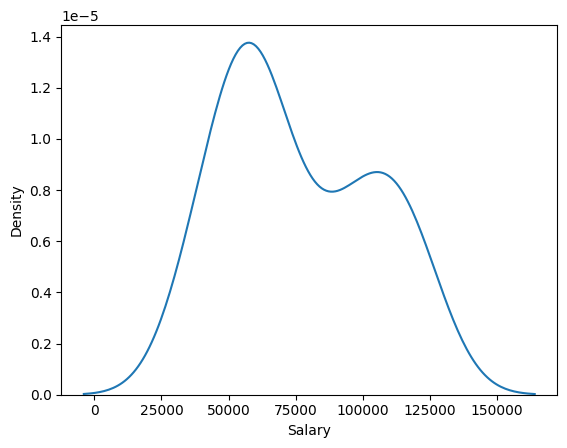

In [15]:
sns.kdeplot(df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

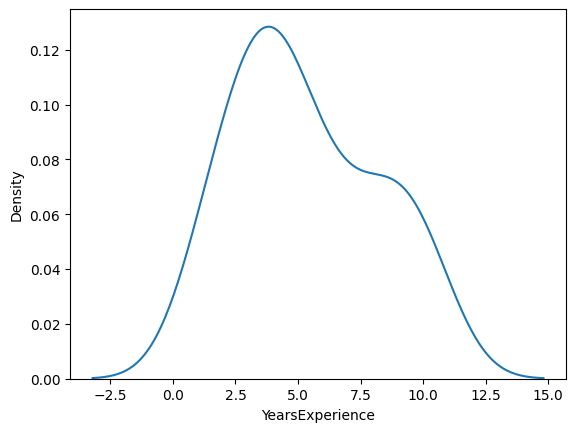

In [16]:
sns.kdeplot(df['YearsExperience'])

<Axes: >

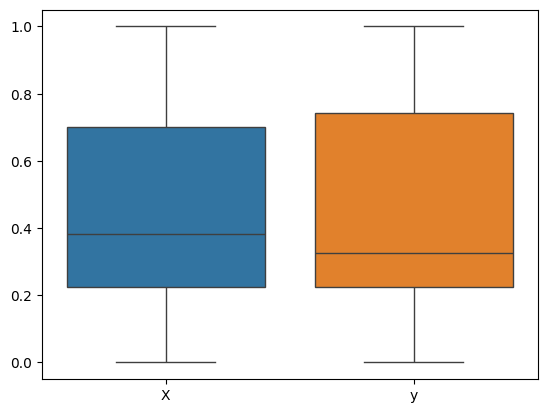

In [23]:
sns.boxplot(df.iloc[:,2:])

<Axes: xlabel='YearsExperience', ylabel='Density'>

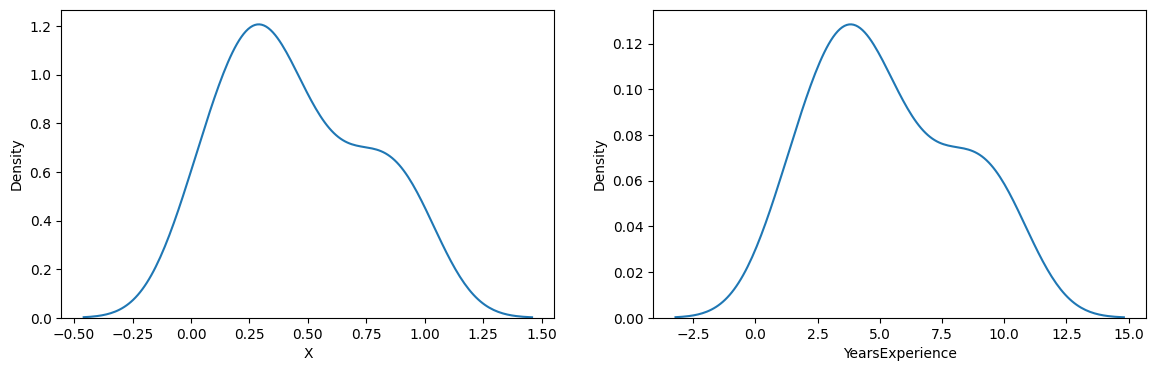

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['X'])

plt.subplot(122)
sns.kdeplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

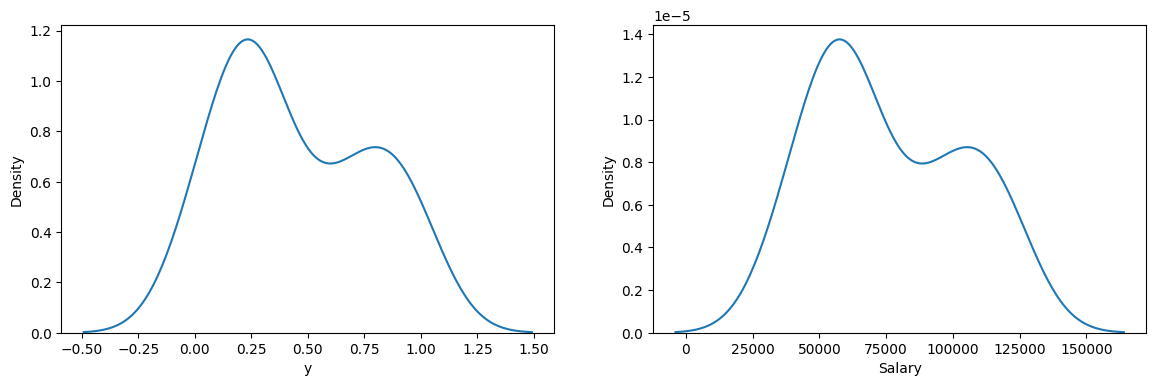

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(df['y'])

plt.subplot(1,2,2)
sns.kdeplot(df['Salary'])

<Axes: >

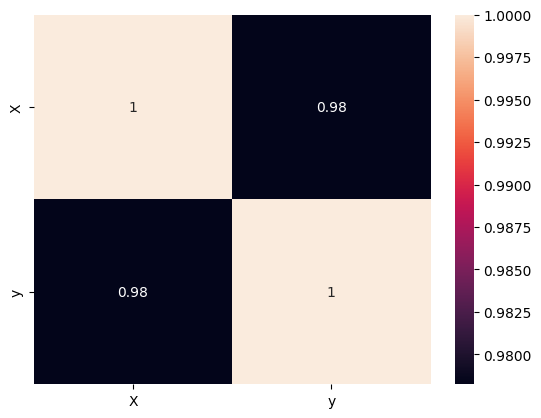

In [30]:
sns.heatmap(df.iloc[:,2:].corr(),annot=True)

<Axes: xlabel='X', ylabel='y'>

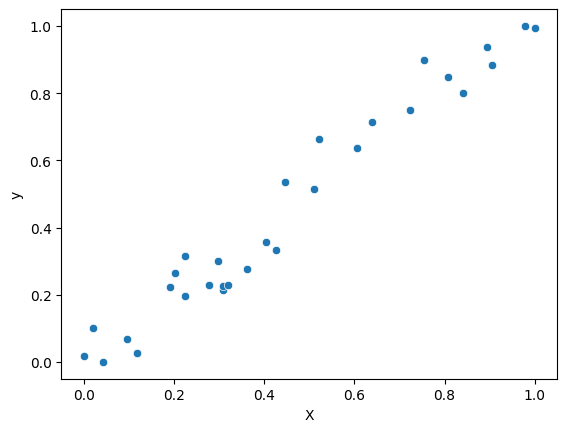

In [31]:
sns.scatterplot(df,x='X',y='y')

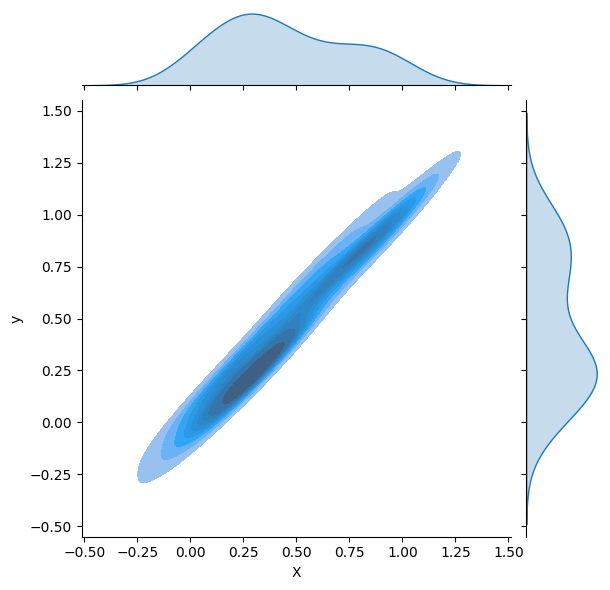

In [35]:
sns.jointplot(df,x='X',y='y',kind='kde',fill=True)

# 5.	Model Building:


In [33]:
from sklearn.metrics import r2_score,mean_squared_error 

<h2>Simple Linera regression

In [34]:
import statsmodels.formula.api as smf
model=smf.ols('y~X',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.14e-20
Time:                        20:59:15   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0182      0.023     -0.807      0.4

In [36]:
y_pred1 =model.predict(df.X)

In [37]:
r2_score(df.y,y_pred1)

0.9569566641435086

In [38]:
mean_squared_error(df.y,y_pred1)

0.004362993548418734

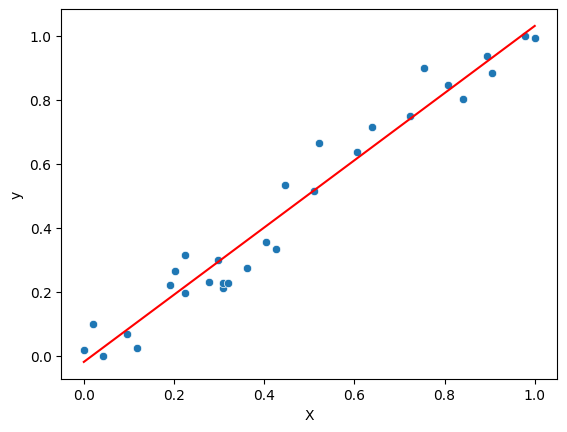

In [44]:
sns.scatterplot(df,x='X',y='y')
plt.plot(df.X,y_pred1,color='red')

# Conclusion After Applying Regression
